In [1]:
import numpy as np
import matplotlib.pyplot as plt

# importing datasets


In [3]:
from keras.datasets import mnist

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
"Training Sets: ",len(X_train) , "Testing Sets: ",len(X_test)

('Training Sets: ', 60000, 'Testing Sets: ', 10000)

In [6]:
def plot_img(X, title):
    plt.imshow(X, cmap='gray')
    plt.title("Num: {}, Image Shape: {}".format(title, X.shape))
    plt.show()

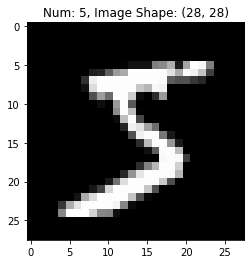

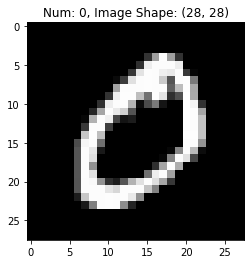

In [7]:
_len = 2
for i in range(_len):
    plot_img(X_train[i], Y_train[i])


# reshaping the dataset

In [8]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [9]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of Y_train: {}".format(Y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of Y_test: {}".format(Y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of Y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of Y_test: (10000,)


# one-hot encoding 

In [10]:
from keras.utils import to_categorical

In [11]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [20]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [19]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# building the model

In [24]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers.convolutional import Conv2D

In [ ]:
IMG_WIDTH = IMG_HEIGHT = 28
input_shape = (IMG_WIDTH, IMG_HEIGHT, 1)

# declare the model
model = Sequential()

layer_1 = Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape)
layer_2 = Conv2D(filters=64, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(units=10, activation='softmax')

# Adding layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                368650    
Total params: 387,466
Trainable params: 387,466
Non-trainable params: 0
_________________________________________________________________


# compiling the model

In [42]:
comment = '''
    compiling the model takes three parameters:  
    1) Optimizer - Controls the learning rate, Eg: adam is the most popular optimizer algo.
    2) Loss Function - Error rate, commonly used => categorical_crossentropy
    3) Metrics - helps to visualize the accuracy score on the validation set while training the model
'''
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# training the model

In [44]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 327s 5ms/step - loss: 0.2839 - accuracy: 0.9542 - val_loss: 0.0831 - val_accuracy: 0.9738
Epoch 2/5
60000/60000 [==============================] - 328s 5ms/step - loss: 0.0602 - accuracy: 0.9809 - val_loss: 0.0792 - val_accuracy: 0.9771
Epoch 3/5
60000/60000 [==============================] - 329s 5ms/step - loss: 0.0419 - accuracy: 0.9869 - val_loss: 0.0854 - val_accuracy: 0.9754
Epoch 4/5
60000/60000 [==============================] - 328s 5ms/step - loss: 0.0330 - accuracy: 0.9901 - val_loss: 0.0868 - val_accuracy: 0.9786
Epoch 5/5
60000/60000 [==============================] - 338s 6ms/step - loss: 0.0272 - accuracy: 0.9922 - val_loss: 0.0934 - val_accuracy: 0.9774


In [48]:
# predicting

example = X_test[0]
prediction = model.predict(example.reshape(1, IMG_WIDTH, IMG_HEIGHT, 1))

In [50]:
prediction

array([[1.0359090e-13, 6.7834885e-19, 1.2261976e-12, 1.8437179e-11,
        4.5493569e-19, 1.2505021e-15, 8.6937025e-20, 1.0000000e+00,
        1.7651623e-12, 3.6154954e-11]], dtype=float32)

In [51]:
np.argmax(prediction)

7

In [60]:
for X in X_test[5]:
    prediction = X.reshape(1, IMG_WIDTH, IMG_HEIGHT, 1)
    plot_img(X.reshape(28, 28), np.argmax(prediction))

ValueError: cannot reshape array of size 28 into shape (1,28,28,1)

In [58]:
X_test[0].reshape(1,IMG_WIDTH, IMG_HEIGHT, 1).shape

(1, 28, 28, 1)

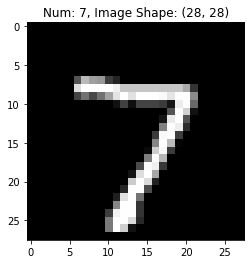

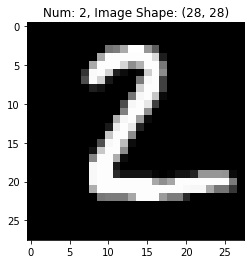

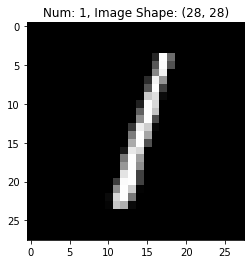

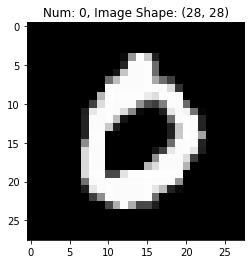

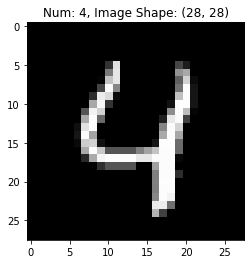

In [67]:
for i in range(5):
    prediction = model.predict(X_test[i].reshape(1, IMG_WIDTH, IMG_HEIGHT, 1))
    plot_img(X_test[i].reshape(28, 28), np.argmax(prediction))

In [68]:
import cv2

In [69]:
img = cv2.imread("test_images/test.jpg")

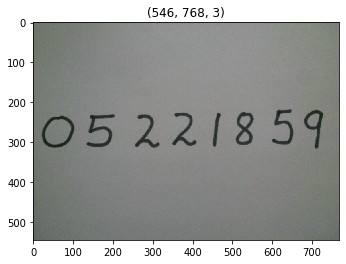

In [72]:
plt.imshow(img)
plt.title(img.shape)
plt.show()

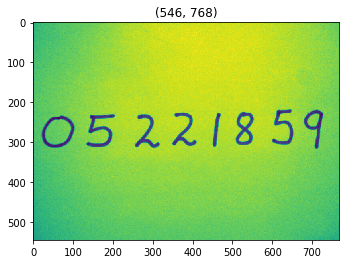

In [74]:
grey = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
plt.imshow(grey)
plt.title(grey.shape)
plt.show()

In [85]:
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

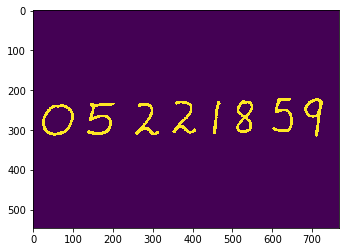

In [82]:
plt.imshow(thresh)

In [86]:
contours

[array([[[ 69, 235]],
 
        [[ 68, 236]],
 
        [[ 67, 236]],
 
        [[ 66, 237]],
 
        [[ 64, 237]],
 
        [[ 63, 238]],
 
        [[ 59, 238]],
 
        [[ 58, 237]],
 
        [[ 54, 237]],
 
        [[ 53, 238]],
 
        [[ 51, 238]],
 
        [[ 50, 239]],
 
        [[ 48, 239]],
 
        [[ 47, 240]],
 
        [[ 45, 240]],
 
        [[ 35, 250]],
 
        [[ 35, 251]],
 
        [[ 33, 253]],
 
        [[ 33, 254]],
 
        [[ 31, 256]],
 
        [[ 31, 257]],
 
        [[ 30, 258]],
 
        [[ 30, 259]],
 
        [[ 28, 261]],
 
        [[ 28, 262]],
 
        [[ 27, 263]],
 
        [[ 27, 264]],
 
        [[ 26, 265]],
 
        [[ 26, 266]],
 
        [[ 25, 267]],
 
        [[ 25, 268]],
 
        [[ 24, 269]],
 
        [[ 24, 272]],
 
        [[ 23, 273]],
 
        [[ 23, 290]],
 
        [[ 24, 291]],
 
        [[ 24, 293]],
 
        [[ 25, 294]],
 
        [[ 25, 297]],
 
        [[ 26, 298]],
 
        [[ 26, 299]],
 
        [[ 27, 3




----------------Contoured Image--------------------


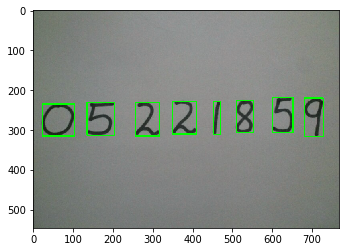

In [87]:
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(img, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(img, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

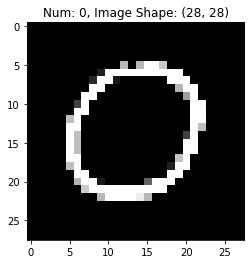

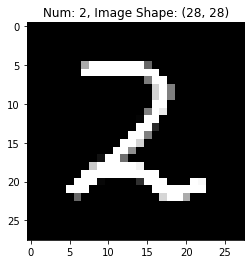

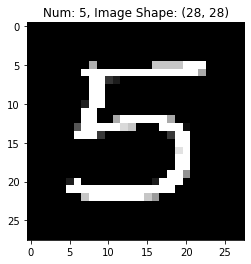

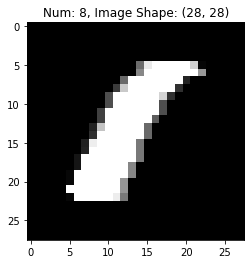

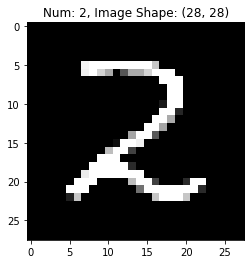

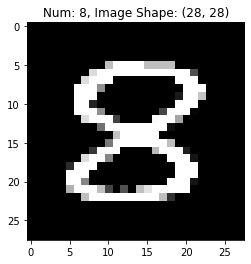

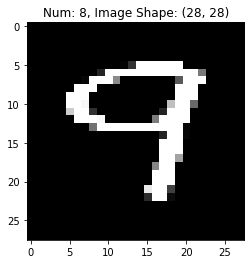

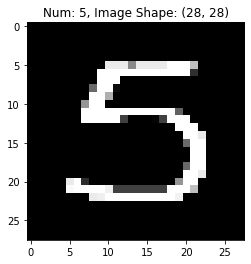

In [94]:
for X in inp:
    prediction = model.predict(X.reshape(1, IMG_WIDTH, IMG_HEIGHT, 1))
    plot_img(X.reshape(28, 28), np.argmax(prediction))
    

In [114]:
steps = '''
    1) Read the image
    2) Convert image to greyscale
    3) Binarize(threshold) the greyscaled image in such a way that only the digits in the image are white and rest is black
    4) Using the binarized image, find contours in the image. Here, contours will provide us the individual digits in the image
'''
def predict_digits(arr):
    return np.argmax(model.predict(arr.reshape(1, IMG_WIDTH, IMG_HEIGHT, 1)))

def extract_digits_from_img(image):
    img = cv2.imread(image)
    grey = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    preprocessed_digits = []
    predicted_digits = []
    for c in contours:
        x,y,w,h = cv2.boundingRect(c)

        # Cropping out the digit from the image corresponding to the current contours in the for loop
        digit = thresh[y:y+h, x:x+w]

        # Resizing that digit to (18, 18)
        resized_digit = cv2.resize(digit, (18,18))

        # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)

        # Adding the preprocessed digit to the list of preprocessed digits
        preprocessed_digits.append(padded_digit)

        inp = np.array(preprocessed_digits)
    
    return inp

Predicted Digits: [0, 2, 5, 8, 2, 8, 8, 5], Length: 8


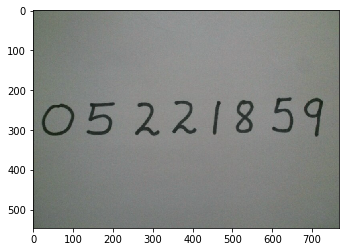

In [131]:
pred_img = "test_images/test.jpg"
pred_digits = []
for img in extract_digits_from_img(pred_img):
    plt.imshow(cv2.imread(pred_img))
    title = predict_digits(img)
    #plt.imshow(img.reshape(28, 28))
    #plt.title("Predicted = {}".format(title))
    #plt.show()
    pred_digits.append(title)
print("Predicted Digits: {}, Length: {}".format(pred_digits, len(pred_digits)))
    